In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("indian-ev-data.csv")
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [3]:
df.drop("id",axis=1,inplace=True)


In [4]:
df.describe()

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   50 non-null     object 
 1   Manufacturer            50 non-null     object 
 2   Vehicle Type            50 non-null     object 
 3   Battery Capacity (kWh)  50 non-null     float64
 4   Range per Charge (km)   50 non-null     int64  
 5   Charging Time           49 non-null     float64
 6   Price                   49 non-null     float64
 7   Power (HP or kW)        49 non-null     float64
 8   Top Speed (km/h)        49 non-null     float64
 9   Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ KB


In [6]:
df.isnull().sum()

Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64

## removing null row

In [7]:
df=df.dropna(axis=0)
df.isnull().sum()

Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             0
Price                     0
Power (HP or kW)          0
Top Speed (km/h)          0
Year of Manufacture       0
dtype: int64

In [9]:
df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


<Axes: xlabel='Vehicle Type', ylabel='Price'>

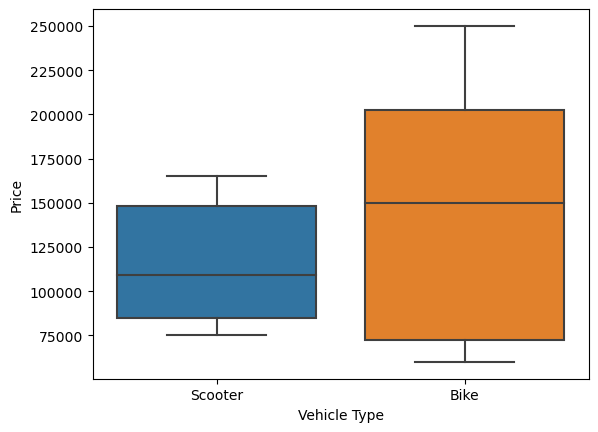

In [15]:
sns.boxplot(df,x='Vehicle Type',y='Price')

<Axes: xlabel='Vehicle Type', ylabel='Power (HP or kW)'>

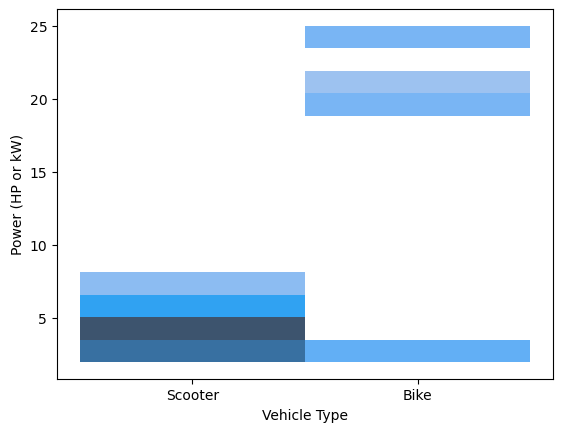

In [21]:
sns.histplot(df,x='Vehicle Type',y='Power (HP or kW)')

In [28]:
#getting all numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [29]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


<Axes: >

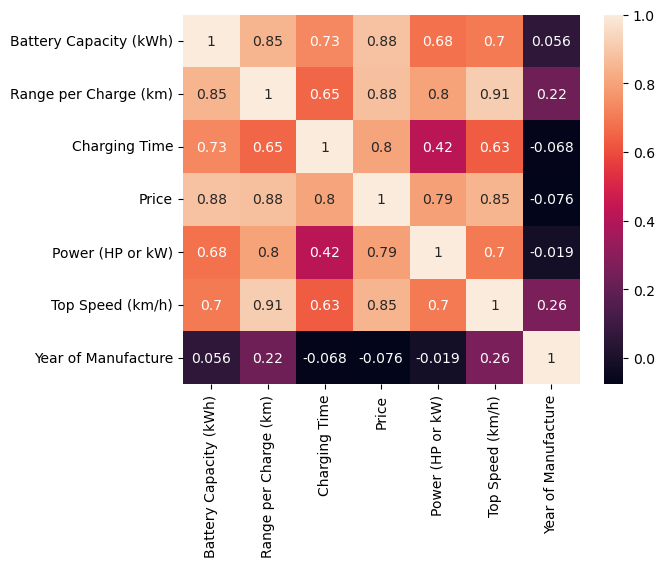

In [30]:
sns.heatmap(df[num_features].corr(),annot=True)

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df_encoded = pd.get_dummies(df, columns=cat_features)

scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [32]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[448.5918367346938,
 288.4755758238684,
 217.43041401776853,
 181.20213479813907,
 145.6767791277829,
 119.44219667772846,
 95.91994595962865,
 77.20089238681133,
 64.95854430235096,
 54.523885169533656]

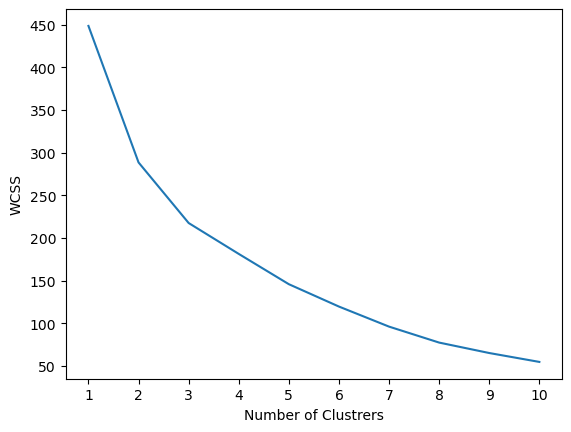

In [34]:
#plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
wss = []
ss = {1: 0}
for i in range(1, 11):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(df_encoded)
    wss.append(KM.inertia_)
    if i > 1:
        y = KM.predict(df_encoded)
        s = silhouette_score(df_encoded, y, random_state=0)
        ss[i] = round(s, 5)
        print(f"The Average Silhouette Score for {i} clusters is {round(s, 5)}")

The Average Silhouette Score for 2 clusters is 0.37263
The Average Silhouette Score for 3 clusters is 0.3516
The Average Silhouette Score for 4 clusters is 0.31922
The Average Silhouette Score for 5 clusters is 0.39407
The Average Silhouette Score for 6 clusters is 0.43191
The Average Silhouette Score for 7 clusters is 0.47097
The Average Silhouette Score for 8 clusters is 0.53112
The Average Silhouette Score for 9 clusters is 0.57215
The Average Silhouette Score for 10 clusters is 0.61203


Text(0, 0.5, 'Average Silhouette Score')

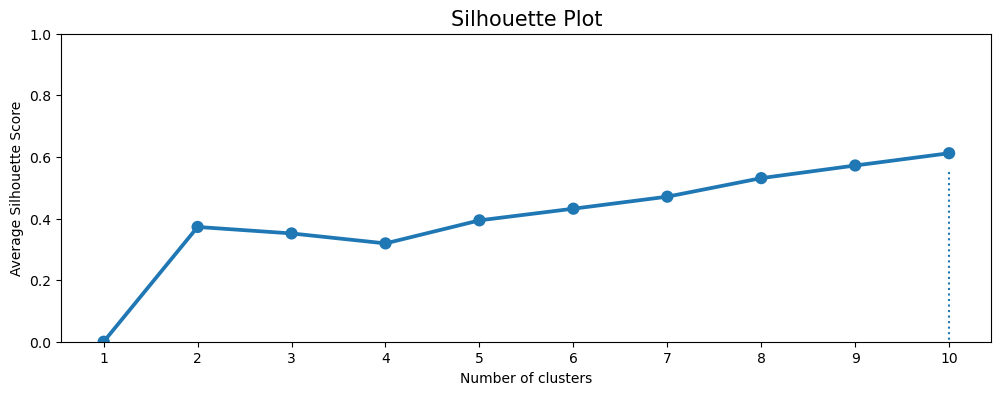

In [63]:
maxkey = [key for key, value in ss.items() if value == max(ss.values())][0]
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(x=list(ss.keys()), y=list(ss.values()))
plt.vlines(x=maxkey - 1, ymax=0, ymin=0.55, linestyles="dotted")
ax.set(ylim=(0, 1))
ax.set_title("Silhouette Plot", size=15)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Average Silhouette Score")

## The data is too much varied, hence the silhoutte score for 10 clusters is greatest

Text(0.5, 1.0, 'K-Means Clustering')

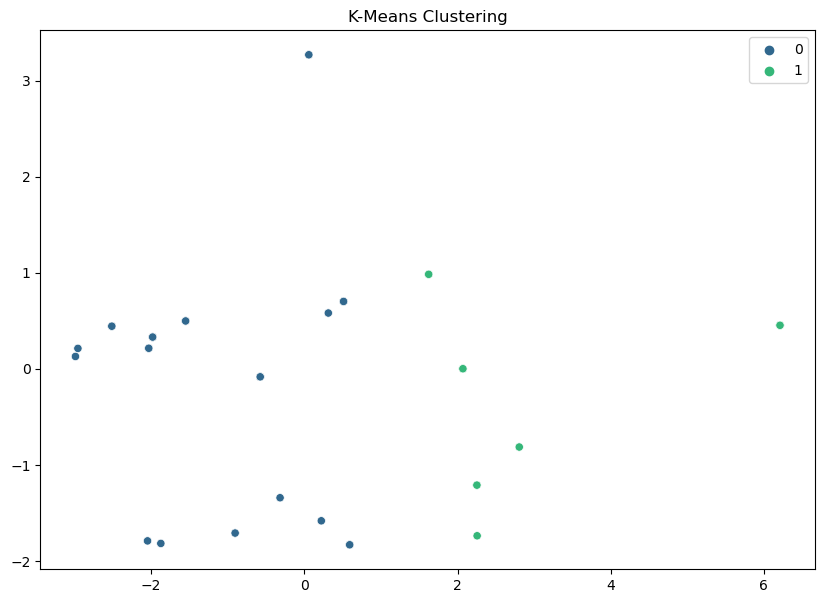

In [44]:
kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans_labels = kmeans.fit_predict(df_encoded)
df['KMeans_Cluster'] = kmeans_labels
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'GMM Clustering')

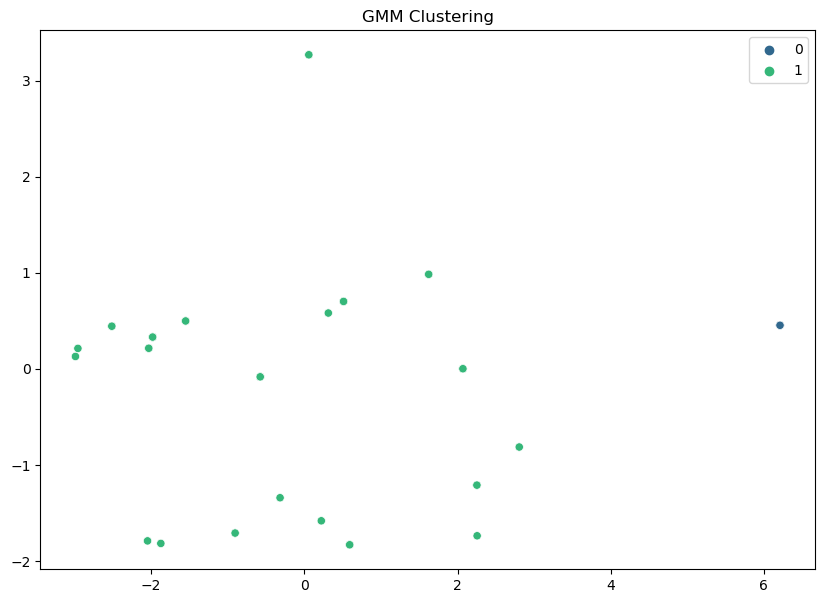

In [45]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_encoded)

df['GMM_Cluster'] = gmm_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=gmm_labels, palette='viridis')
plt.title('GMM Clustering')

## when the no of clusters are 2:
## cluster 0 belongs to Electric Scooters
### they have lower price, power, battery capacity, etc.
## cluster 1 belongs to Electric Bike
### they have higher prices,power,etc

Text(0.5, 1.0, 'K-Means Clustering')

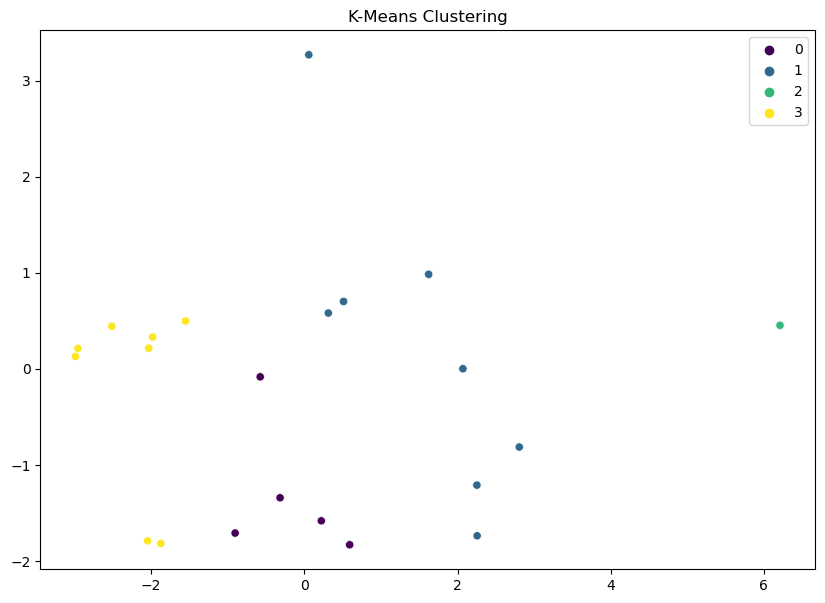

In [46]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans_labels = kmeans.fit_predict(df_encoded)
df['KMeans_Cluster4'] = kmeans_labels
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

In [56]:
df[df['KMeans_Cluster4']==3]

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,KMeans_Cluster,GMM_Cluster,KMeans_Cluster4
3,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0,1,3
4,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0,1,3
10,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0,1,3
11,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0,1,3
16,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0,1,3
17,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0,1,3
20,Ampere Reo,Ampere Vehicles,Scooter,3.0,100,3.5,80000.0,3.0,60.0,2021.0,0,1,3
21,Urbanite X1,Electric Vehicle Co.,Scooter,2.5,100,3.0,75000.0,3.0,60.0,2021.0,0,1,3
22,Joy e-Ride,Joy E-Bike,Bike,2.2,80,2.5,60000.0,2.0,50.0,2021.0,0,1,3
25,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0,1,3


# When no of cluster is 4

## 0 Cluster
#### All the Scooter with Battery Capacity ranging from 2.7 to 3.5kwh
#### Average price is around 110000
#### Top Speed is 80-85km/h

## 1 Cluster
#### Scooters and Bikes with Battery Capacity ranging till 4.5kwh
#### Average price is around 150000
#### Top Speed is 90km/h
#### It has more power compared to previous one

## 2 Cluster
#### Bikes with Battery Capacity of 6.2kwh
#### Average price is around 80000-85000
#### Top Speed is 60km/h
#### It has more power compared to previous one

## 3 Cluster
#### Scooters and Bikes with Battery Capacity ranging from 2-3kwh
#### Average price is around 250000
#### Top Speed is 100km/h
#### It has less power and range than the previous clusters

Text(0.5, 1.0, 'Heatmap of Feature Means by K-Means Clusters')

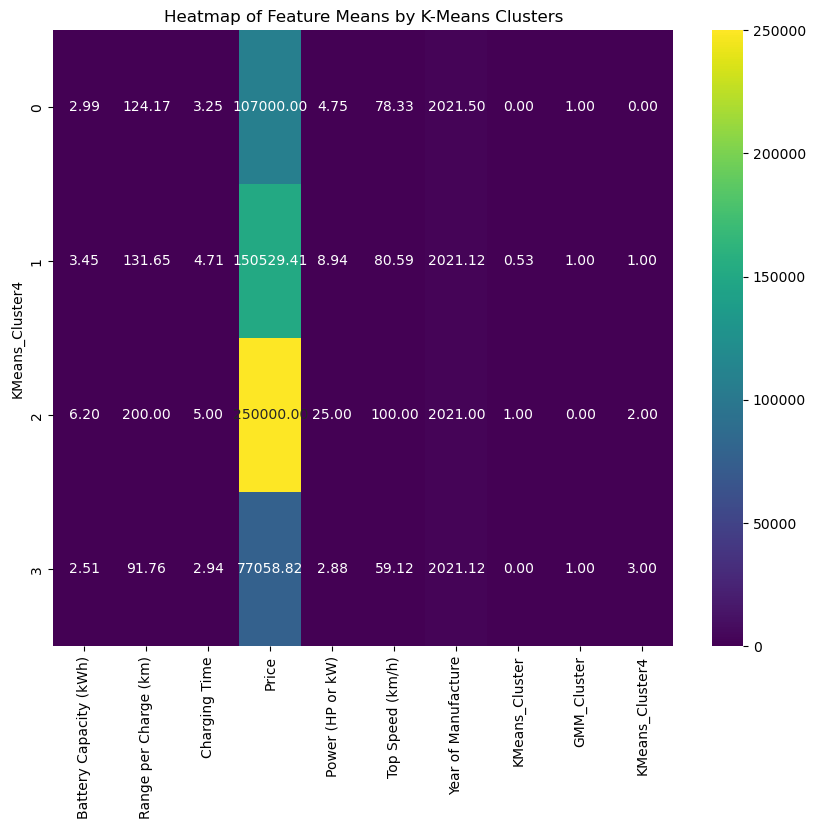

In [57]:
numeric_df = df.select_dtypes(include=[float, int])

kmeans_cluster_means = numeric_df.groupby(df['KMeans_Cluster4']).mean()

plt.figure(figsize=(10, 8))
sns.heatmap(kmeans_cluster_means, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Feature Means by K-Means Clusters')

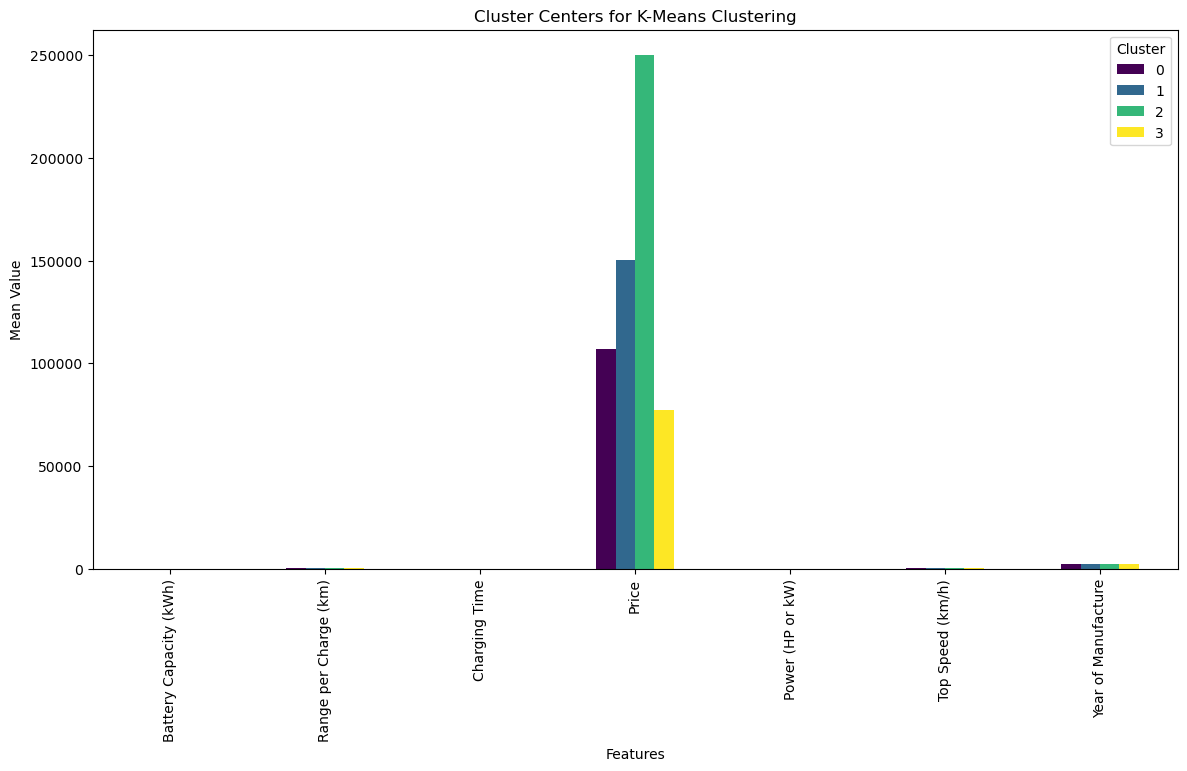

In [59]:
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_[:, :len(num_features)])
kmeans_centers_df = pd.DataFrame(kmeans_centers, columns=num_features)

kmeans_centers_df.T.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Cluster Centers for K-Means Clustering')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Cluster', loc='upper right')

Text(0.5, 1.0, '2D PCA Plot of K-Means Clustering')

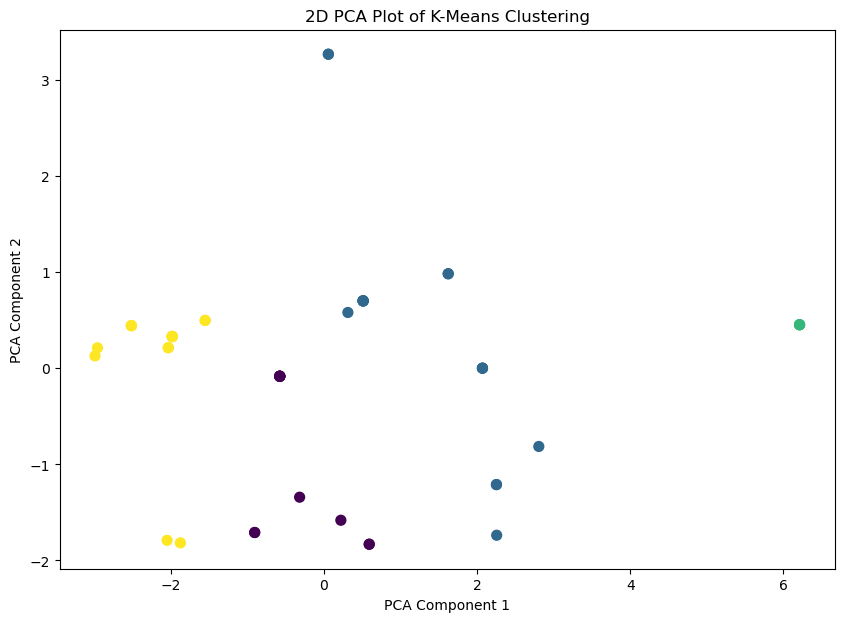

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Plot of K-Means Clustering')

In [64]:
df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,KMeans_Cluster,GMM_Cluster,KMeans_Cluster4
0,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0,0,1,1
1,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0,0,1,0
2,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0,0,1,1
3,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0,1,3
4,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0,1,3
